# Telecom Churn Prediction

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the csv
df_churn=pd.read_csv('churn_data.csv')
df_customer=pd.read_csv('customer_data.csv')
df_internet=pd.read_csv('internet_data.csv')

In [3]:
df_churn.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df_customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [5]:
df_internet.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [6]:
#Merging Churn data and customer data with primary key customerID
df=pd.merge(df_churn, df_customer, how='inner', on='customerID')
df=pd.merge(df, df_internet, how='inner', on='customerID')
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [7]:
df.shape

(7043, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [9]:
df.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [10]:
#Visualize null values if any
import klib
klib.missingval_plot(df)

No missing values found in the dataset.


There are no missing values in the data set.

In [11]:
df_columns=df.columns
df_columns

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [12]:
df_binary_columns=['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']
def yes_no(x):
    return x.map({'Yes': 1, 'No': 0})

df[df_binary_columns]= df[df_binary_columns].apply(yes_no)
df.gender=df['gender'].apply(lambda x: 1 if x=='Male' else 0)
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,0,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,1,...,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,1,...,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,...,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,0,...,0,0,No,Fiber optic,No,No,No,No,No,No


#### One hot encoding for categorical variables with more than one categories

In [13]:
one_hot_list=['Contract', 'PaymentMethod', 'InternetService', 'MultipleLines', 'OnlineSecurity','OnlineBackup', 
              'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for i in one_hot_list:
    print(i)
    print(df[i].value_counts())
    print('--------------------------------------------------------------')

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64
--------------------------------------------------------------
PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64
--------------------------------------------------------------
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
--------------------------------------------------------------
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
--------------------------------------------------------------
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
--------------------------------------------------------------
OnlineBackup
No          

In [14]:
#creating dummies for the above columns:
dummy1=pd.get_dummies(df[one_hot_list],drop_first=True)
df=df.drop(one_hot_list, axis=1)

df=pd.concat([df, dummy1], axis=1)
df.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,5575-GNVDE,34,1,0,56.95,1889.5,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7043 non-null   object 
 6   Churn                                  7043 non-null   int64  
 7   gender                                 7043 non-null   int64  
 8   SeniorCitizen                          7043 non-null   int64  
 9   Partner                                7043 non-null   int64  
 10  Dependents                             7043 non-null   int64  
 11  Cont

The variable TotalCharges is of object type. Changing it's data type:

In [16]:
df.TotalCharges=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [17]:
#Dropping customerID
df=df.drop('customerID', axis=1)

In [18]:
df.gender.value_counts()

1    3555
0    3488
Name: gender, dtype: int64

In [19]:
#Checking for null values again since TotalCharges changed to numeric
df.isnull().sum()

tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
gender                                    0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
InternetService_Fiber optic               0
InternetService_No                        0
MultipleLines_No phone service            0
MultipleLines_Yes                         0
OnlineSecurity_No internet service        0
OnlineSecurity_Yes                        0
OnlineBackup_No internet service          0
OnlineBackup_Yes                

In [20]:
df=df[~df.TotalCharges.isnull()==True]

In [21]:
#Checking for outliers:
df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe(percentiles=[0.0, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99, 1.0])

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
0%,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
90%,69.000000,102.645000,5976.640000
95%,72.000000,107.422500,6923.590000


#### There are no outliers in the data

### Data Pre-processing for training the model

In [22]:
df.columns

Index(['tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes'],
      dtype='object')

In [23]:
y=df.pop('Churn')
X=df
print(y.head())
X.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64


,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,Contract_One year,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,34,1,0,56.95,1889.50,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,2,1,1,53.85,108.15,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,45,0,0,42.30,1840.75,1,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
4,2,1,1,70.70,151.65,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
from sklearn.model_selection import train_test_split
print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=100, train_size=0.7)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7032, 30)
(7032,)
(4922, 30)
(4922,)
(2110, 30)
(2110,)


### Feature scaling

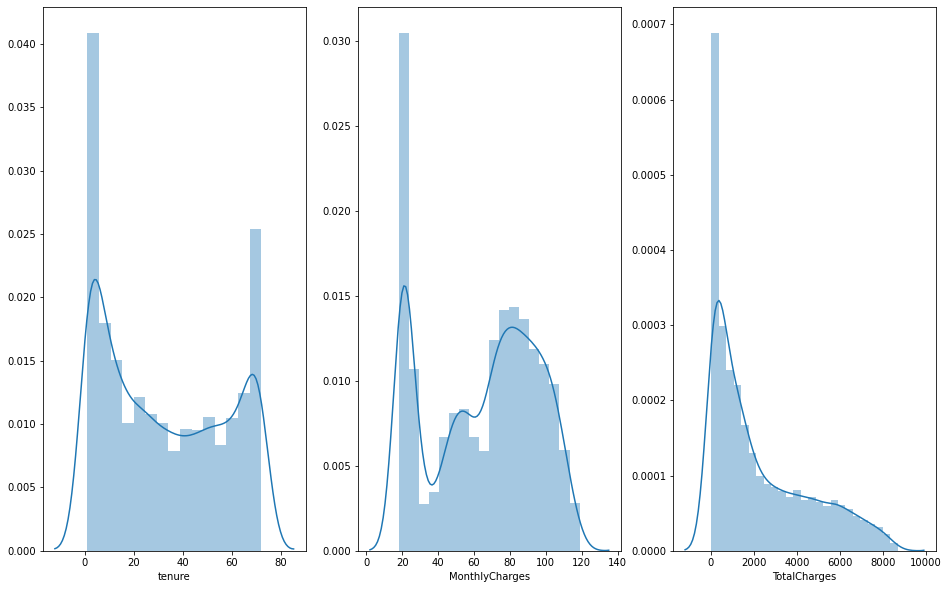

In [25]:
#The columns 'tenure', 'MonthlyCharges', 'TotalCharges' needs to be scaled.
#Checking whether the data of these variables follows a Gaussian distribution or not.

plt.figure(figsize=(16,10))
plt.subplot(1,3,1)
sns.distplot(df.tenure)
plt.subplot(1,3,2)
sns.distplot(df.MonthlyCharges)
plt.subplot(1,3,3)
sns.distplot(df.TotalCharges)
plt.show()

In [26]:
#If the data doesn't follow Gaussian distribution MinMaxScaler(Normalization) must be used. But in the course StandardScaler is used.
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train[['tenure', 'MonthlyCharges', 'TotalCharges']]=scaler.fit_transform(X_train[['tenure', 'MonthlyCharges', 'TotalCharges']])
X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,Contract_One year,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
879,0.019693,1,1,-0.338074,-0.276449,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5790,0.305384,0,1,-0.464443,-0.112702,0,0,1,1,0,...,0,1,0,0,0,0,0,1,0,1
6498,-1.286319,1,1,0.581425,-0.974430,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
880,-0.919003,1,1,1.505913,-0.550676,1,0,0,0,0,...,0,1,0,1,0,1,0,1,0,1
2784,-1.163880,1,1,1.106854,-0.835971,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,1


In [27]:
y_train.head()

879     0
5790    0
6498    1
880     1
2784    1
Name: Churn, dtype: int64

In [28]:
#Checking if there is a major bias in Churn in test data
churn_rate= (y_train.sum())/(y_train.shape[0])
churn_rate

0.26147907354733846

Churn rate is 26%

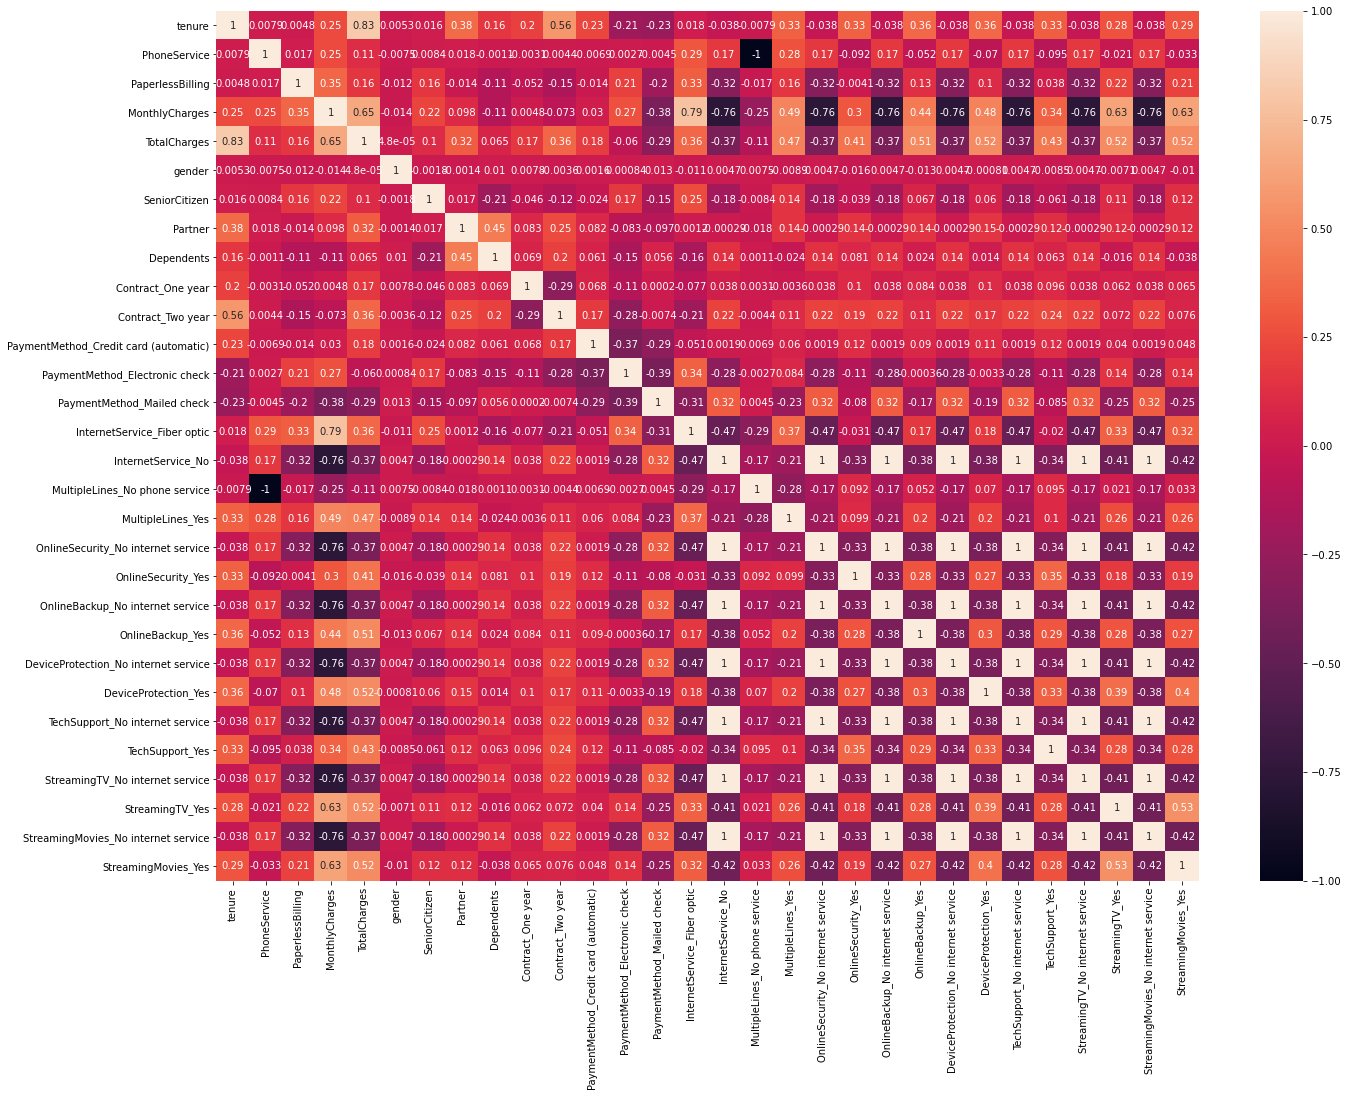

In [29]:
#Checking correlation.
plt.figure(figsize=(22,16))
sns.heatmap(df.corr(), annot=True)
plt.show()